In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as datetime

from matplotlib import style
style.use("ggplot")
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('All_wells_final3.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()
model_mse_dict={}
model_R2_dict={}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   7882 non-null   object 
 1   WELL_BORE_CODE            7882 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     7882 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  7882 non-null   float64
 4   AVG_DP_TUBING             7882 non-null   float64
 5   AVG_ANNULUS_PRESS         7882 non-null   float64
 6   AVG_CHOKE_SIZE_P          7882 non-null   float64
 7   AVG_WHP_P                 7882 non-null   float64
 8   AVG_WHT_P                 7882 non-null   float64
 9   DP_CHOKE_SIZE             7882 non-null   float64
 10  BORE_OIL_VOL              7882 non-null   float64
 11  BORE_GAS_VOL              7882 non-null   float64
 12  BORE_WAT_VOL              7882 non-null   float64
 13  WELL_POS                  7882 non-null   object 
dtypes: float

In [3]:
#Dropping AVG_ANNULUS PRESSURE as this is not measured at the surface, dropping downhole temp as this is related to downhole pressure
data=data.drop(['AVG_ANNULUS_PRESS'], axis=1)
data = data.loc[data['AVG_DOWNHOLE_PRESSURE']!= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 7881
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 4   AVG_DP_TUBING             5943 non-null   float64
 5   AVG_CHOKE_SIZE_P          5943 non-null   float64
 6   AVG_WHP_P                 5943 non-null   float64
 7   AVG_WHT_P                 5943 non-null   float64
 8   DP_CHOKE_SIZE             5943 non-null   float64
 9   BORE_OIL_VOL              5943 non-null   float64
 10  BORE_GAS_VOL              5943 non-null   float64
 11  BORE_WAT_VOL              5943 non-null   float64
 12  WELL_POS                  5943 non-null   object 
dtypes: float64(10), object(3)
memory usage: 650.0+ KB


In [4]:
#To check 0 values
data.astype(bool).sum(axis=0)

DATEPRD                     5943
WELL_BORE_CODE              5943
AVG_DOWNHOLE_PRESSURE       5943
AVG_DOWNHOLE_TEMPERATURE    5943
AVG_DP_TUBING               5943
AVG_CHOKE_SIZE_P            5943
AVG_WHP_P                   5940
AVG_WHT_P                   5943
DP_CHOKE_SIZE               5943
BORE_OIL_VOL                5941
BORE_GAS_VOL                5943
BORE_WAT_VOL                5572
WELL_POS                    5943
dtype: int64

Using chi-square test to understand relationship between categorical variables and downhole_pressure
P values are very low. So we can reject our Null Hypothesis which is these features are independent and have no relationship with target variable-downhole pressure

data_slc = data.loc[:, 'AVG_DOWNHOLE_TEMPERATURE':'BORE_WAT_VOL']
col = list(data_slc.columns)
col

for ticker in col:
    
    csq=chi2_contingency(pd.crosstab(data['AVG_DOWNHOLE_PRESSURE'], data[ticker]))
    #print("P-value: ",csq[1])
    print("P-value for {} is {}".format(ticker, csq[1]))

In [5]:
#df1 = pd.get_dummies(data[["WELL_BORE_CODE","AVG_DP_TUBING","AVG_ANNULUS_PRESS","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P", "DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL" ]])
df1 = pd.get_dummies(data[["WELL_BORE_CODE","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P", "DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL" ]])
feature_names = df1.columns
df1.head()



,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WELL_BORE_CODE_NO 15/9-F-1 C,WELL_BORE_CODE_NO 15/9-F-11 H,WELL_BORE_CODE_NO 15/9-F-12 H,WELL_BORE_CODE_NO 15/9-F-14 H,WELL_BORE_CODE_NO 15/9-F-15 D
0,43.34,107.36,37.94,78.94,631.47,90439.09,0.0,1,0,0,0,0
1,47.17,99.19,60.76,70.63,1166.46,165720.39,0.0,1,0,0,0,0
2,47.73,94.60,63.05,66.05,1549.81,221707.31,0.0,1,0,0,0,0
3,48.53,89.99,64.55,61.41,1248.70,178063.52,0.0,1,0,0,0,0
4,49.84,84.78,65.72,56.15,1345.78,192602.19,0.0,1,0,0,0,0


In [6]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

In [7]:
print(X.shape)
print(y.shape)

(5943, 12)
(5943, 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#Scaling X axis
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

In [10]:
#Scaling Y axis
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

LINEAR REGRESSION WITH WELL BORE CODE

R2 Score: 0.7048217210518402
Mean Squared Error (MSE): 0.2903155345860211
R-squared (R2 ): 0.7048217210518402


Text(0.5, 1.0, 'Residual Plot')

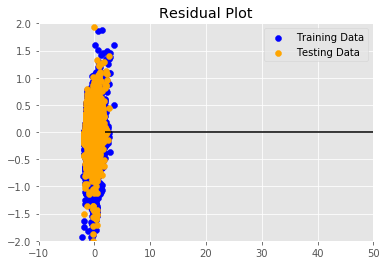

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")


from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(LINEAR_REG = mse)
model_R2_dict.update(LINEAR_REG = r2)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s).reshape(-1,1), model.predict(X_train_s).reshape(-1,1) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s).reshape(-1,1), model.predict(X_test_s).reshape(-1,1) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.ylim(-2,2)
plt.xlim(-10,50)
plt.title("Residual Plot")


In [12]:
importances= model.coef_
sorted(zip(importances[0],feature_names),reverse=True)

[(1.0511020457327622, 'DP_CHOKE_SIZE'),
 (0.7922070884336836, 'BORE_OIL_VOL'),
 (0.4274911532420504, 'BORE_WAT_VOL'),
 (0.35937760497789795, 'WELL_BORE_CODE_NO 15/9-F-12 H'),
 (0.24115122331216865, 'AVG_WHT_P'),
 (0.15912073329334686, 'AVG_CHOKE_SIZE_P'),
 (-0.0020531536004117835, 'WELL_BORE_CODE_NO 15/9-F-14 H'),
 (-0.08641205680508805, 'WELL_BORE_CODE_NO 15/9-F-1 C'),
 (-0.1255945486051289, 'WELL_BORE_CODE_NO 15/9-F-11 H'),
 (-0.17741464149224678, 'WELL_BORE_CODE_NO 15/9-F-15 D'),
 (-0.3323161671928218, 'AVG_WHP_P'),
 (-1.3599127399214455, 'BORE_GAS_VOL')]

LASSO REGRESSION

In [13]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001,normalize=False)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")


R2 Score: 0.701884854535167


Mean Squared Error (MSE): 0.29320401938860874
R-squared (R2 ): 0.701884854535167


Text(0.5, 1.0, 'Residual Plot')

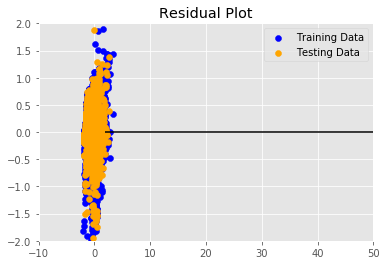

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(LASSO_REG = mse)
model_R2_dict.update(LASSO_REG = r2)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s).reshape(-1,1), model.predict(X_train_s).reshape(-1,1) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s).reshape(-1,1), model.predict(X_test_s).reshape(-1,1) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.ylim(-2,2)
plt.xlim(-10,50)
plt.title("Residual Plot")

In [15]:
importances = model.coef_
sorted(zip(importances,feature_names),reverse=True)

[(0.9313360436898441, 'DP_CHOKE_SIZE'),
 (0.48562789403083567, 'WELL_BORE_CODE_NO 15/9-F-12 H'),
 (0.387407852469944, 'BORE_WAT_VOL'),
 (0.25257650163147394, 'AVG_WHT_P'),
 (0.1680239961409086, 'WELL_BORE_CODE_NO 15/9-F-14 H'),
 (0.16620487267872047, 'AVG_CHOKE_SIZE_P'),
 (-0.0, 'WELL_BORE_CODE_NO 15/9-F-11 H'),
 (-0.0, 'WELL_BORE_CODE_NO 15/9-F-1 C'),
 (0.0, 'BORE_OIL_VOL'),
 (-0.06206610579782985, 'WELL_BORE_CODE_NO 15/9-F-15 D'),
 (-0.2204880498217181, 'AVG_WHP_P'),
 (-0.5856085781792008, 'BORE_GAS_VOL')]

RANDOM FOREST REGRESSION

In [16]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=100)
rf = rf.fit(X_train_s, y_train_s)
rf.score(X_test_s, y_test_s)

C:\Users\RAKHI\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8729838090347057

Mean Squared Error (MSE): 0.12492373596244731
R-squared (R2 ): 0.8729838090347057


Text(0.5, 1.0, 'Residual Plot')

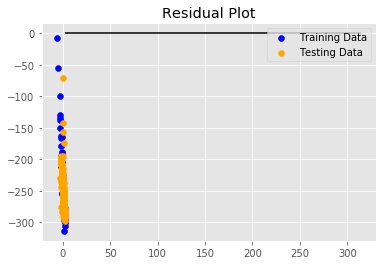

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = rf.predict(X_test_s)
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RAND_FOR_REG = mse)
model_R2_dict.update(RAND_FOR_REG = r2)

# Plot the Residuals for the Training and Testing data
plt.scatter(rf.predict(X_train_s).reshape(-1,1), rf.predict(X_train_s).reshape(-1,1) - y_train, c="blue", label="Training Data")
plt.scatter(rf.predict(X_test_s).reshape(-1,1), rf.predict(X_test_s).reshape(-1,1) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [18]:
importances= rf.feature_importances_
sorted(zip(importances,feature_names),reverse=True)

[(0.32013596186433824, 'WELL_BORE_CODE_NO 15/9-F-15 D'),
 (0.14416778942617867, 'AVG_WHT_P'),
 (0.13246274020035428, 'AVG_WHP_P'),
 (0.11674588635422277, 'BORE_OIL_VOL'),
 (0.07988745309273673, 'BORE_WAT_VOL'),
 (0.06221293775485698, 'DP_CHOKE_SIZE'),
 (0.05695902166754223, 'BORE_GAS_VOL'),
 (0.0350856352936839, 'WELL_BORE_CODE_NO 15/9-F-12 H'),
 (0.023575284138675504, 'AVG_CHOKE_SIZE_P'),
 (0.015454965187429663, 'WELL_BORE_CODE_NO 15/9-F-14 H'),
 (0.010260284705815265, 'WELL_BORE_CODE_NO 15/9-F-1 C'),
 (0.0030520403141659613, 'WELL_BORE_CODE_NO 15/9-F-11 H')]

RIDGE REGRESSION

R2 Score: 0.7048162153904839
Mean Squared Error (MSE): 0.29032094954753385
R-squared (R2 ): 0.7048162153904838


Text(0.5, 1.0, 'Residual Plot')

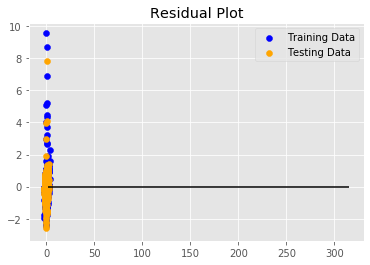

In [19]:
## training the model
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RIDGE_REG = mse)
model_R2_dict.update(RIDGE_REG = r2)


# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [20]:
importances= model.coef_
sorted(zip(importances[0],feature_names),reverse=True)

[(1.0500556032203072, 'DP_CHOKE_SIZE'),
 (0.7824839621697752, 'BORE_OIL_VOL'),
 (0.4270049016900434, 'BORE_WAT_VOL'),
 (0.3594484966911655, 'WELL_BORE_CODE_NO 15/9-F-12 H'),
 (0.24121890950676864, 'AVG_WHT_P'),
 (0.15919535327844272, 'AVG_CHOKE_SIZE_P'),
 (-0.0019876962934030212, 'WELL_BORE_CODE_NO 15/9-F-14 H'),
 (-0.08643446388939137, 'WELL_BORE_CODE_NO 15/9-F-1 C'),
 (-0.12568342000581842, 'WELL_BORE_CODE_NO 15/9-F-11 H'),
 (-0.17746910170766872, 'WELL_BORE_CODE_NO 15/9-F-15 D'),
 (-0.3314224350042238, 'AVG_WHP_P'),
 (-1.3503765896677677, 'BORE_GAS_VOL')]

In [21]:
#Displaying the MSE scores by models
model_mse_dict

{'LINEAR_REG': 0.2903155345860211,
 'LASSO_REG': 0.29320401938860874,
 'RAND_FOR_REG': 0.12492373596244731,
 'RIDGE_REG': 0.29032094954753385}

In [22]:
#Displaying the R2 scores by models
model_R2_dict

{'LINEAR_REG': 0.7048217210518402,
 'LASSO_REG': 0.701884854535167,
 'RAND_FOR_REG': 0.8729838090347057,
 'RIDGE_REG': 0.7048162153904838}